In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Inception 

In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### there is no missing value in any cols

In [8]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

Column: sex
male      676
female    662
Name: sex, dtype: int64

Column: bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

Column: children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Column: smoker
no     1064
yes     274
Name: smoker, dtype: int64

Column: region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Col

there is no nah value

# Outliner detection 


In [54]:
float_columns = df.select_dtypes(include='float').columns
integer_columns = df.select_dtypes(include='integer').columns

for column in float_columns:  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

    
    print(f"Outliers in float column {column}:")
    print(outliers)
    print("\n")


for column in integer_columns:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]


    print(f"Outliers in integer column {column}:")
    print(outliers)
    print("\n")

Outliers in float column bmi:
      age     sex    bmi  children smoker     region      charges  \
116    58    male  49.06         0     no  southeast  11381.32540   
286    46  female  48.07         2     no  northeast   9432.92530   
401    47    male  47.52         1     no  southeast   8083.91980   
543    54  female  47.41         0    yes  southeast  63770.42801   
847    23    male  50.38         1     no  southeast   2438.05520   
860    37  female  47.60         2    yes  southwest  46113.51100   
1047   22    male  52.58         1    yes  southeast  44501.39820   
1088   52    male  47.74         1     no  southeast   9748.91060   
1317   18    male  53.13         0     no  southeast   1163.46270   

      Age_Category       BMI_Category  
116   Older Adults  Obese (Class III)  
286   Older Adults  Obese (Class III)  
401   Older Adults  Obese (Class III)  
543   Older Adults  Obese (Class III)  
847   Young Adults  Obese (Class III)  
860     Old Adults  Obese (Class III)  

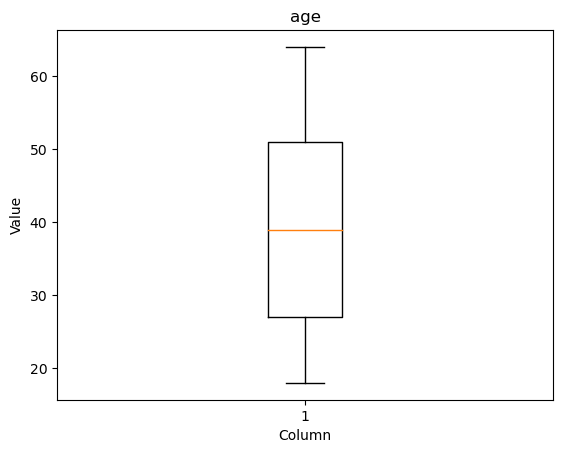

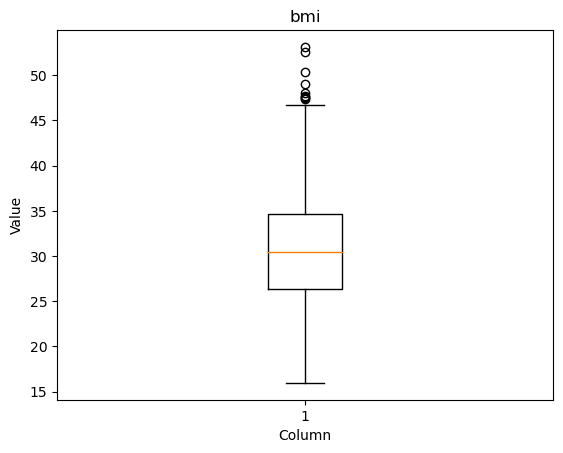

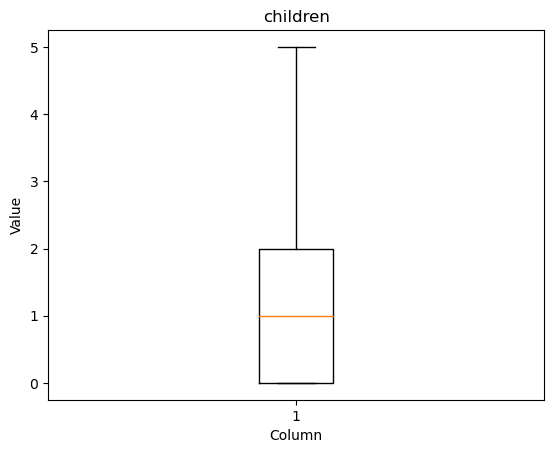

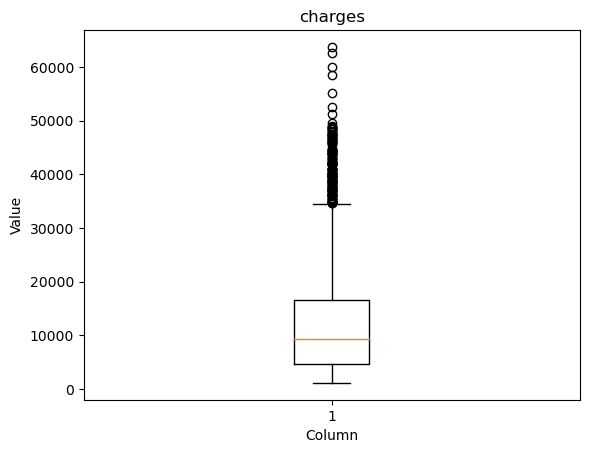

In [9]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
for column in numeric_cols:
    plt.figure()  
    plt.boxplot(df[column].dropna())  
    plt.title(column)
    plt.xlabel('Column')
    plt.ylabel('Value') 
    plt.show() 

In [10]:
import numpy as np
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)])

print("Number of outliers:", outliers_count)


Number of outliers: 9


In [11]:
import numpy as np
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)])

print("Number of outliers:", outliers_count)


Number of outliers: 139


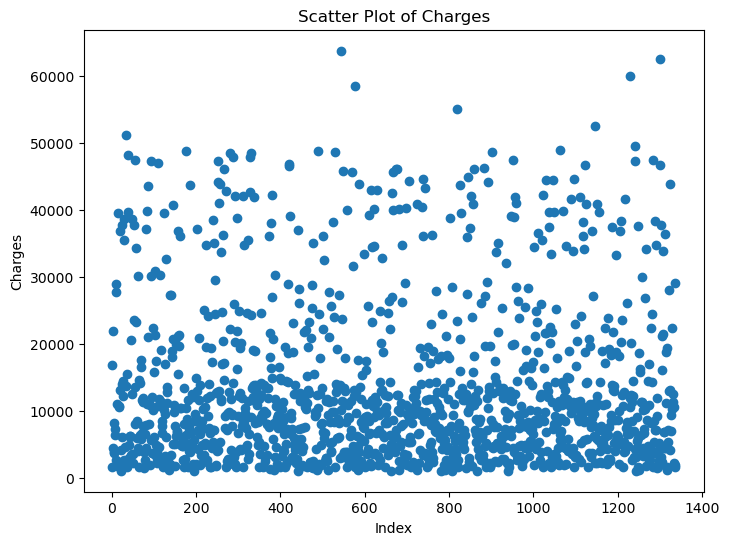

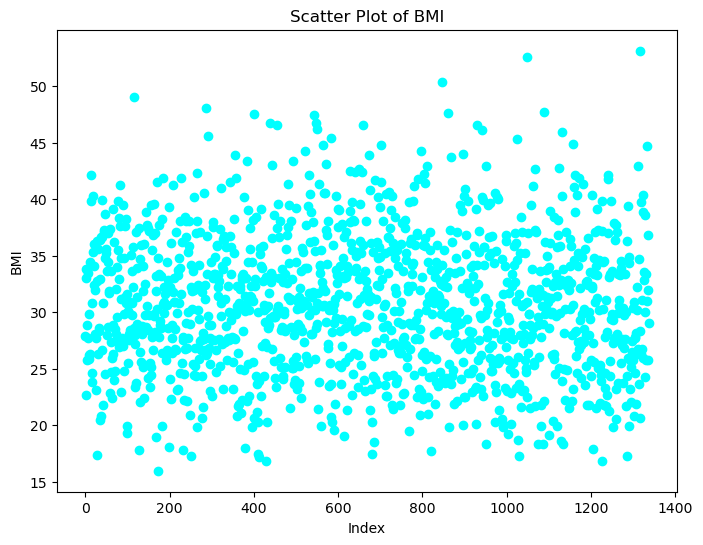

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['charges'])
plt.title('Scatter Plot of Charges')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.show()

# Create the second scatter plot for 'bmi' column
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['bmi'],color='cyan')
plt.title('Scatter Plot of BMI')
plt.xlabel('Index')
plt.ylabel('BMI')
plt.show()

### In col Age the no. of outliner is very less so we will just ignore it  and in charges there are almost 10% outliners we will keep that in mind if the accuracy of model is less we will fix those outliners


# Eda Part(Data Visualization)

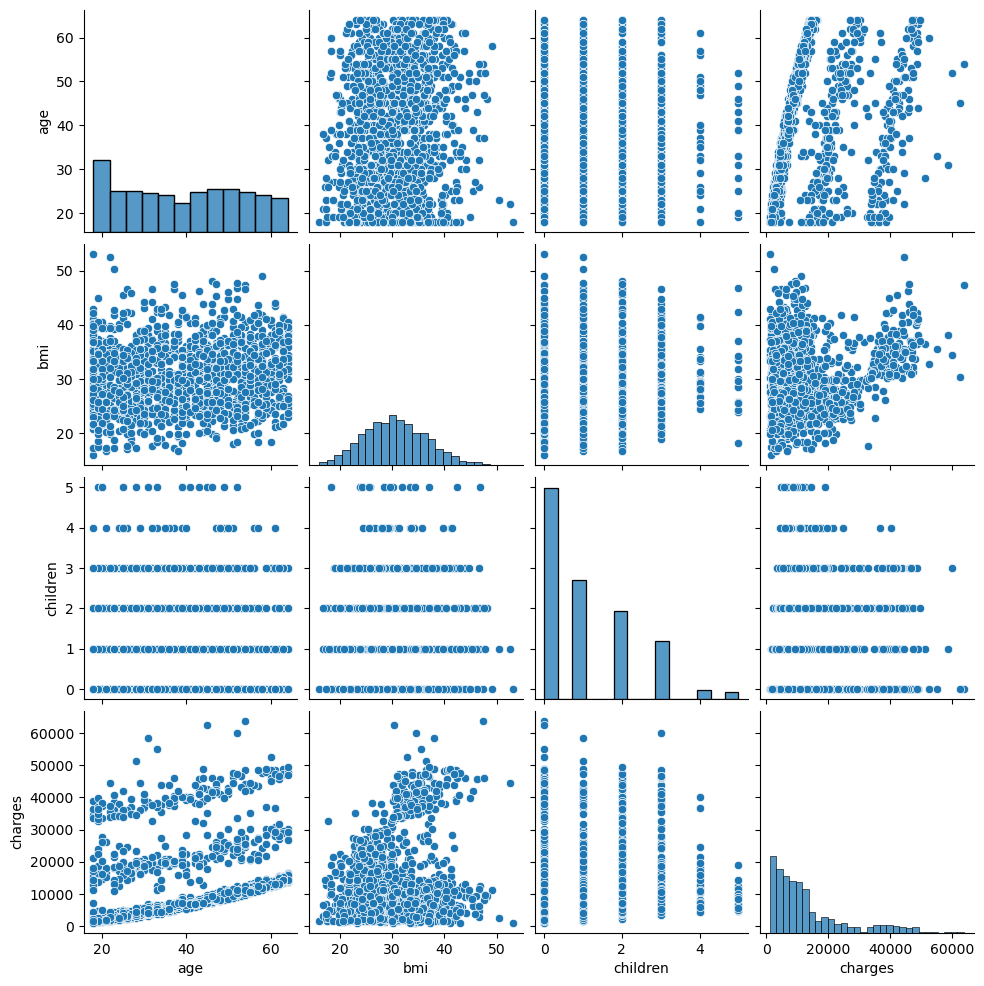

In [13]:
sns.pairplot(df)

In [15]:
column_names = ['region', 'age', 'sex', 'smoker', 'children' ,'bmi']
for column in column_names:
    fig = px.histogram(df, x=column, color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_layout(
        title=column,
        xaxis_title="Value",
        yaxis_title="Frequency"
    )
    fig.show()

### The Above graph shows distribution on the basis of Count in very Col

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  Adding a seperate col to display the category of Age

In [17]:
age_ranges = [
    (0, 2, 'Baby'),
    (3, 16, 'Children'),
    (17, 30, 'Young Adults'),
    (31, 45, 'Old Adults'),
    (46, float('inf'), 'Older Adults')
]
df['Age_Category'] = pd.cut(df['age'], bins=[start-0.5 for start, _, _ in age_ranges] + [float('inf')], 
                            labels=[category for _, _, category in age_ranges], right=False)
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      Age_Category  
0     Young Adults  
1     Young Adults  
2     Young Adults  
3       Old Adults  
4       Old Adults  
...            ...  
1333  Older 

## Adding a Separate col to categories bmi  


In [19]:
bmi_ranges = [
    (float('-inf'), 16.0, 'Underweight (Severe thinness)'),
    (16.0, 16.9, 'Underweight (Moderate thinness)'),
    (17.0, 18.4, 'Underweight (Mild thinness)'),
    (18.5, 24.9, 'Normal range'),
    (25.0, 29.9, 'Overweight (Pre-obese)'),
    (30.0, 34.9, 'Obese (Class I)'),
    (35.0, 39.9, 'Obese (Class II)'),
    (40.0, float('inf'), 'Obese (Class III)')
]

# Create a new column 'BMI Category' and assign the corresponding category for each BMI value
df['BMI_Category'] = pd.cut(df['bmi'], bins=[start for start, _, _ in bmi_ranges] + [float('inf')], 
                            labels=[category for _, _, category in bmi_ranges], right=False)

# Print the DataFrame with the 'BMI Category' column
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      Age_Category            BMI_Category  
0     Young Adults  Overweight (Pre-obese)  
1     Young Adults         Obese (Class I)  
2     Young Adults      

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Age_Category,BMI_Category
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adults,Overweight (Pre-obese)
1,18,male,33.770,1,no,southeast,1725.55230,Young Adults,Obese (Class I)
2,28,male,33.000,3,no,southeast,4449.46200,Young Adults,Obese (Class I)
3,33,male,22.705,0,no,northwest,21984.47061,Old Adults,Normal range
4,32,male,28.880,0,no,northwest,3866.85520,Old Adults,Overweight (Pre-obese)


## The above categories have been created on the basis of https://en.wikipedia.org/wiki/Body_mass_index

In [21]:
column_names = ['BMI_Category', 'Age_Category']
for column in column_names:
    fig = px.histogram(df, x=column)
    fig.update_layout(
        title=column,
        xaxis_title="Value",
        yaxis_title="Frequency"
    )
    fig.show()

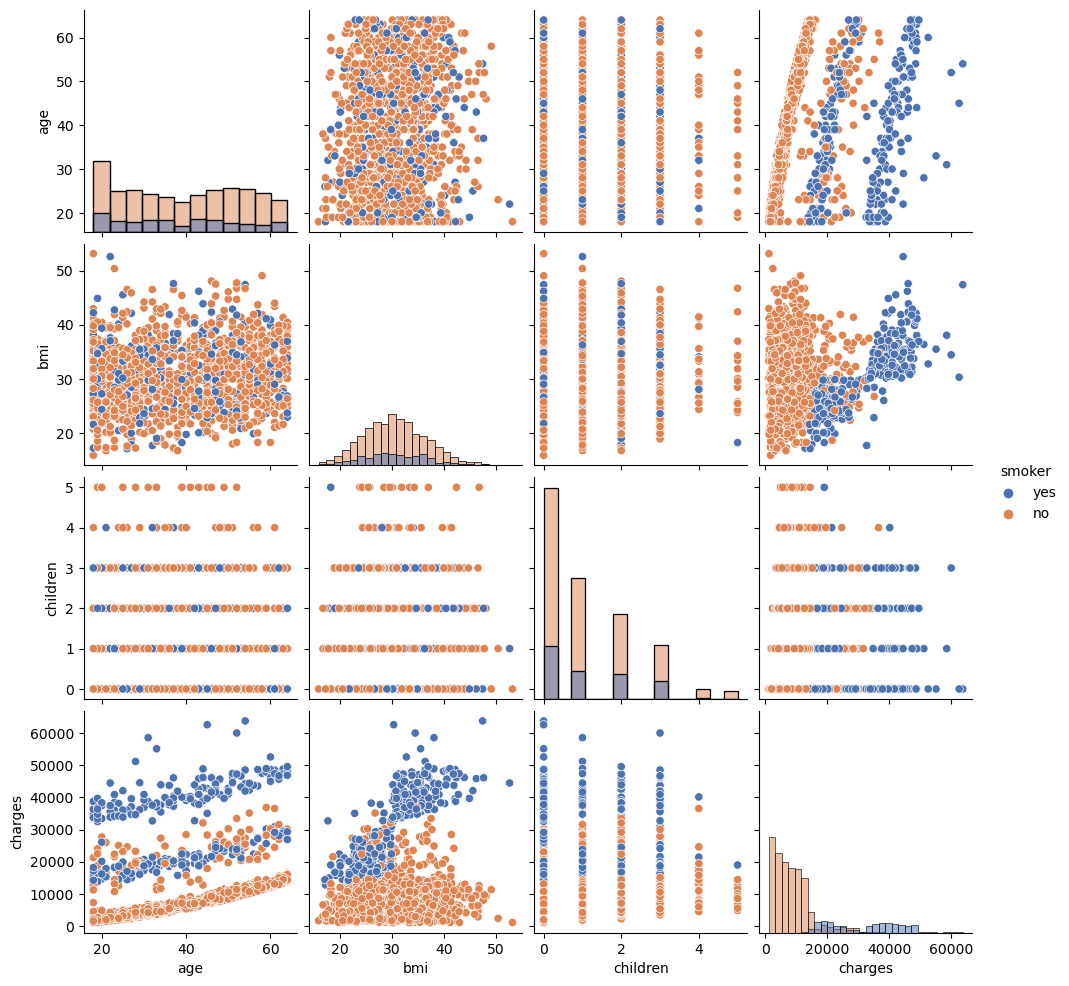

In [22]:
sns.pairplot(df,hue="smoker",palette="deep",diag_kind="hist")

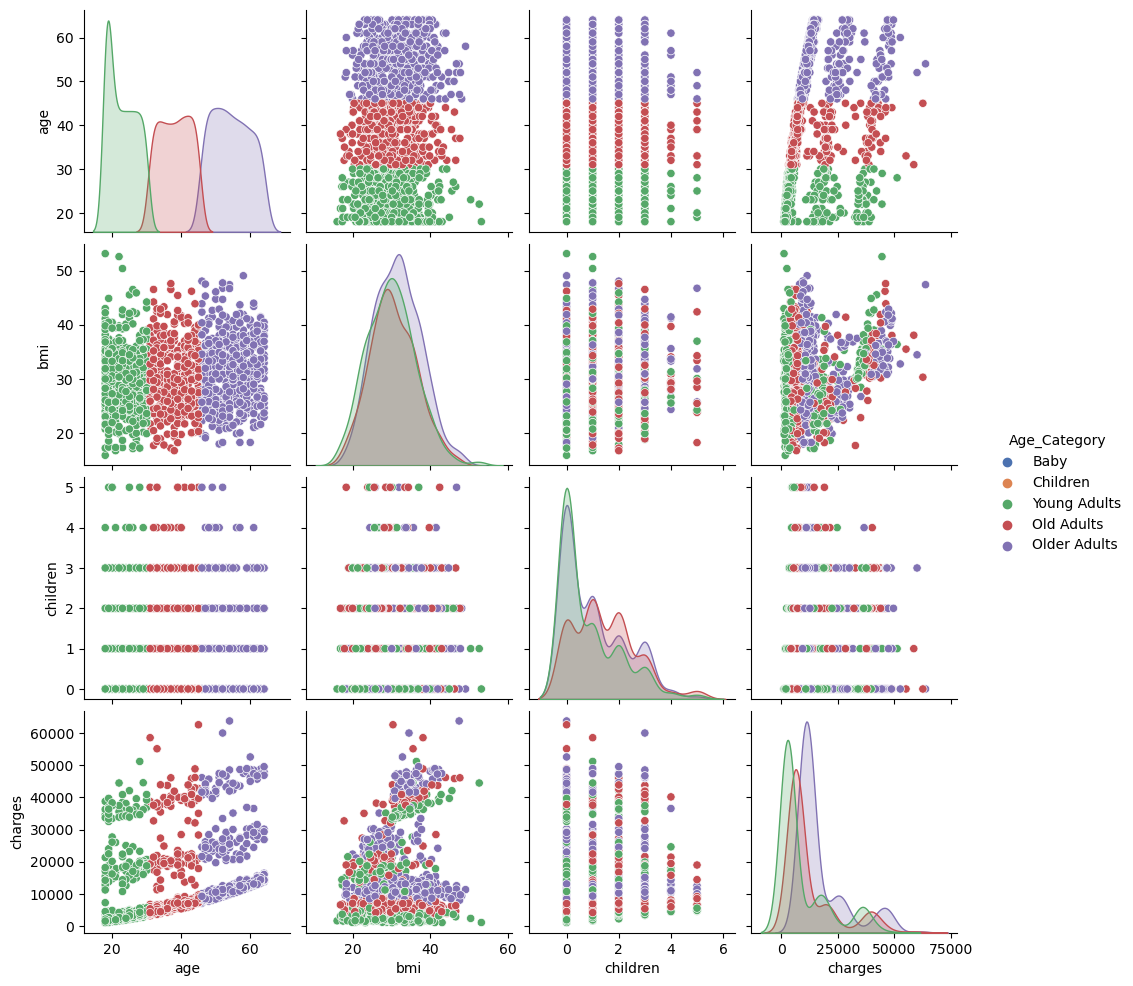

In [23]:
sns.pairplot(df,hue="Age_Category",palette="deep")

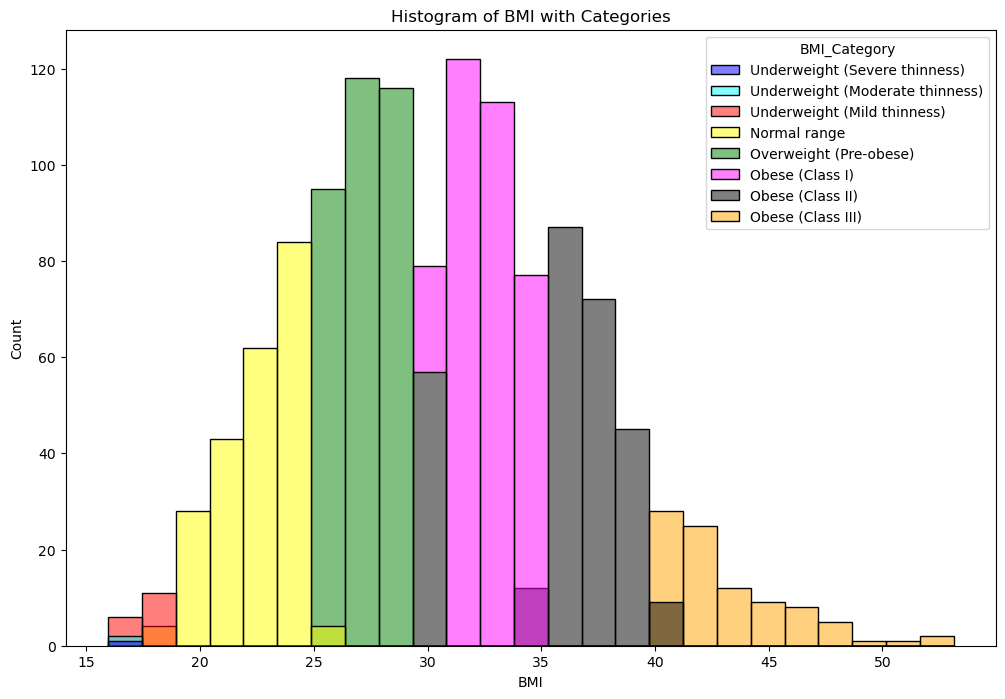

In [26]:
custom_palette = ["blue", "cyan", "red", "yellow", "green", "magenta", "black", "orange"]
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='bmi', hue='BMI_Category', palette=custom_palette)
plt.title('Histogram of BMI with Categories')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8908\1633498967.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Text(0, 0.5, 'Count')

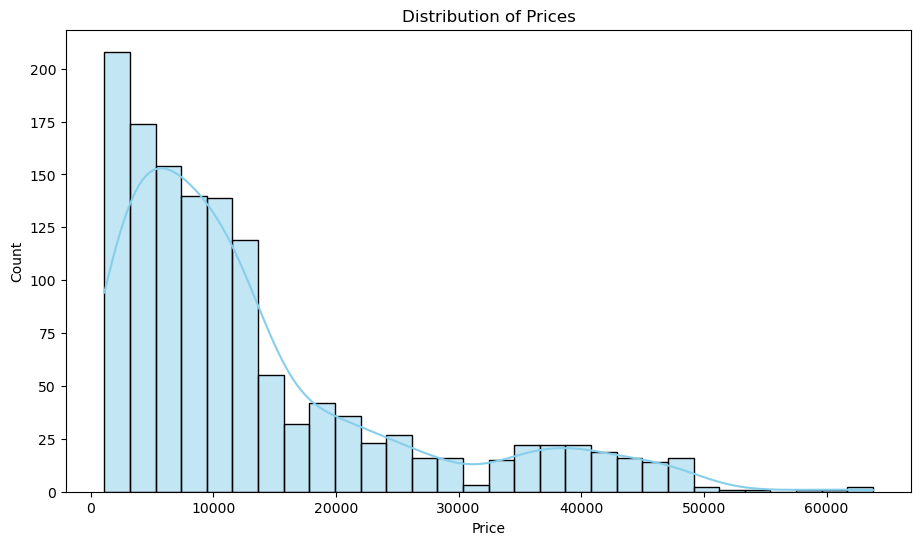

In [27]:
plt.subplots(figsize=(24, 6))
plt.subplot(1, 2, 2)
sns.histplot(x='charges', data=df, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')

In [28]:
cross_table = pd.crosstab(df['Age_Category'], df['BMI_Category'])
styled_table = cross_table.style.background_gradient(cmap='Blues')
styled_table

BMI_Category,Underweight (Severe thinness),Underweight (Moderate thinness),Underweight (Mild thinness),Normal range,Overweight (Pre-obese),Obese (Class I),Obese (Class II),Obese (Class III)
Age_Category,,,,,,,,
Young Adults,1,1,9,93,122,132,61,25
Old Adults,0,1,4,66,128,107,63,25
Older Adults,0,0,4,66,136,152,101,41


In [29]:
cross_table = pd.crosstab(df['smoker'], df['Age_Category'])
styled_table = cross_table.style.background_gradient(cmap='Blues')
styled_table

Age_Category,Young Adults,Old Adults,Older Adults
smoker,,,
no,349,307,408
yes,95,87,92


In [30]:
cross_table = pd.crosstab(df['children'], df['Age_Category'])
styled_table = cross_table.style.background_gradient(cmap='Blues')
styled_table

Age_Category,Young Adults,Old Adults,Older Adults
children,,,
0,248,97,229
1,85,121,118
2,62,105,73
3,37,53,67
4,7,8,10
5,5,10,3


In [33]:
import plotly.graph_objects as go
data = pd.read_csv('insurance.csv')
grouped_data = data.groupby('sex')['charges'].sum()
fig = go.Figure(data=[go.Bar(x=grouped_data.index, y=grouped_data.values)])
fig.update_layout(
    title='Total Charges by Gender',
    xaxis=dict(title='Sex'),
    yaxis=dict(title='Total Charges')
)
fig.show()

# total charges for female is 8.3 Million  and male is 9.4 Million

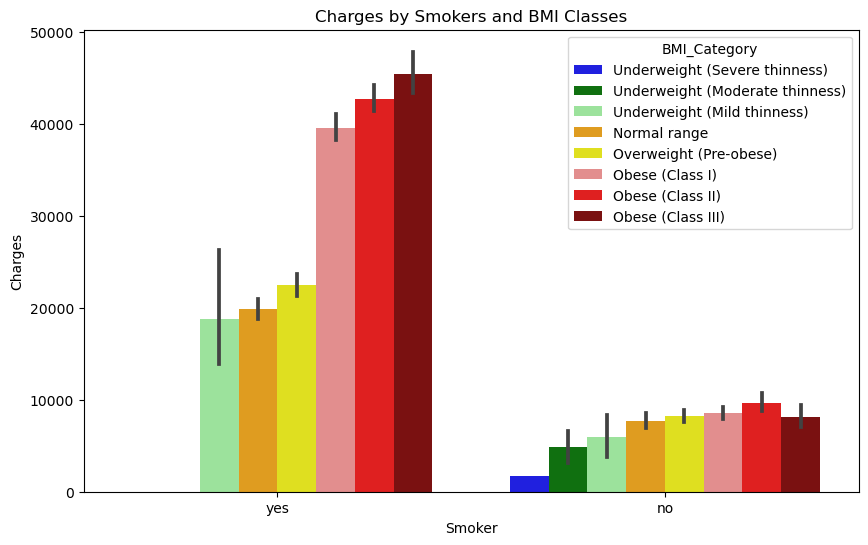

In [43]:
color_palette = {
    'Underweight (Severe thinness)': 'blue',
    'Underweight (Moderate thinness)': 'green',
    'Underweight (Mild thinness)': 'lightgreen',
    'Normal range': 'orange',
    'Overweight (Pre-obese)': 'yellow',
    'Obese (Class I)': 'lightcoral',
    'Obese (Class II)': 'red',
    'Obese (Class III)': 'darkred'
}

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(data=df, x='smoker', y='charges', hue='BMI_Category', palette=color_palette)

# Set the chart title and axis labels
plt.title('Charges by Smokers and BMI Classes')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Show the plot
plt.show()


## Charge w.r.t Age and BMI

In [69]:
import plotly.graph_objects as go

# Define markers for 'smoker' column
markers = {'yes': 'square', 'no': 'x'}

# Define colors for 'BMI_Category'
colors = {
    'Underweight (Severe thinness)': 'blue',
    'Underweight (Moderate thinness)': 'green',
    'Underweight (Mild thinness)': 'lightgreen',
    'Normal range': 'orange',
    'Overweight (Pre-obese)': 'yellow',
    'Obese (Class I)': 'lightcoral',
    'Obese (Class II)': 'red',
    'Obese (Class III)': 'darkred'
}

# Create the scatter plot using Plotly
fig = go.Figure()

# Add traces for each combination of 'BMI_Category' and 'smoker'
for bmi_class in df['BMI_Category'].unique():
    for smoker in df['smoker'].unique():
        data_filtered = df[(df['BMI_Category'] == bmi_class) & (df['smoker'] == smoker)]
        fig.add_trace(go.Scatter(
            x=data_filtered['age'],
            y=data_filtered['charges'],
            mode='markers',
            marker_symbol=markers[smoker],
            marker_color=colors[bmi_class],
            name=f"BMI: {bmi_class}, Smoker: {smoker}"
        ))

# Set the chart title and axis labels
fig.update_layout(
    title='Scatter Plot: Charges by Age',
    xaxis_title='Age',
    yaxis_title='Charges'
)

# Show the plot
fig.show()


# Regionwise and smoker w.r.t charges

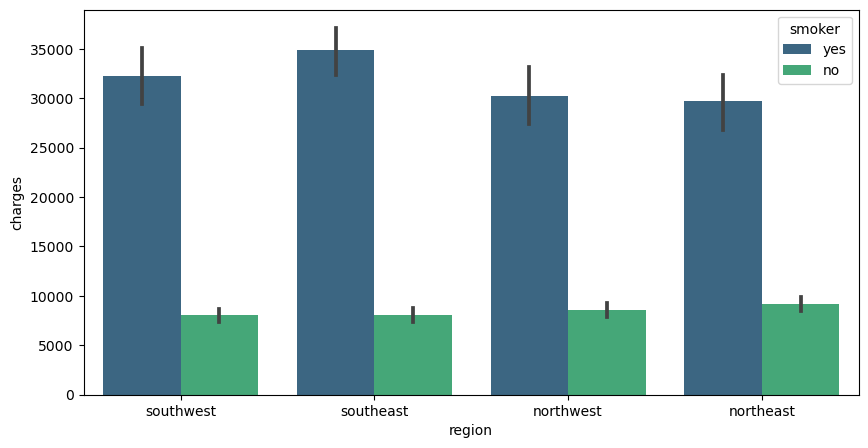

In [46]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x = 'region', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='viridis')

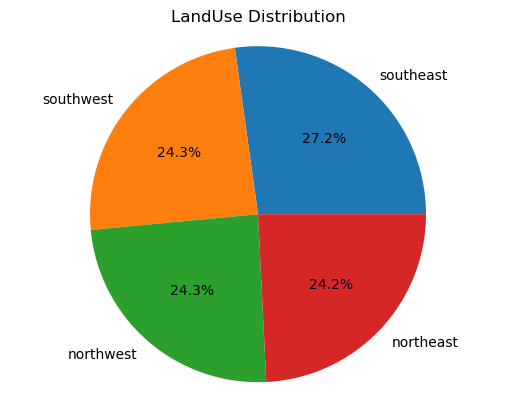

In [53]:
landuse_counts = df['region'].value_counts()
fig, ax = plt.subplots()
ax.pie(landuse_counts.values, labels=landuse_counts.index, autopct='%1.1f%%')
ax.set_title('LandUse Distribution')
ax.axis('equal')
plt.show()

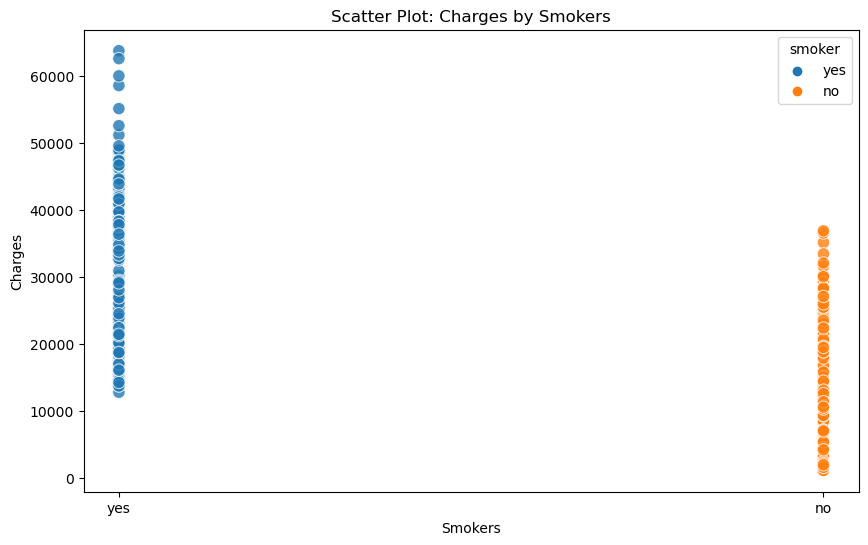

In [47]:

plt.figure(figsize=(10, 6))

# Create the scatter plot using Seaborn
sns.scatterplot(data=df, x='smoker', y='charges', hue='smoker', s=80, alpha=0.8)

# Set the chart title and axis labels
plt.title('Scatter Plot: Charges by Smokers')
plt.xlabel('Smokers')
plt.ylabel('Charges')

# Show the plot
plt.show()


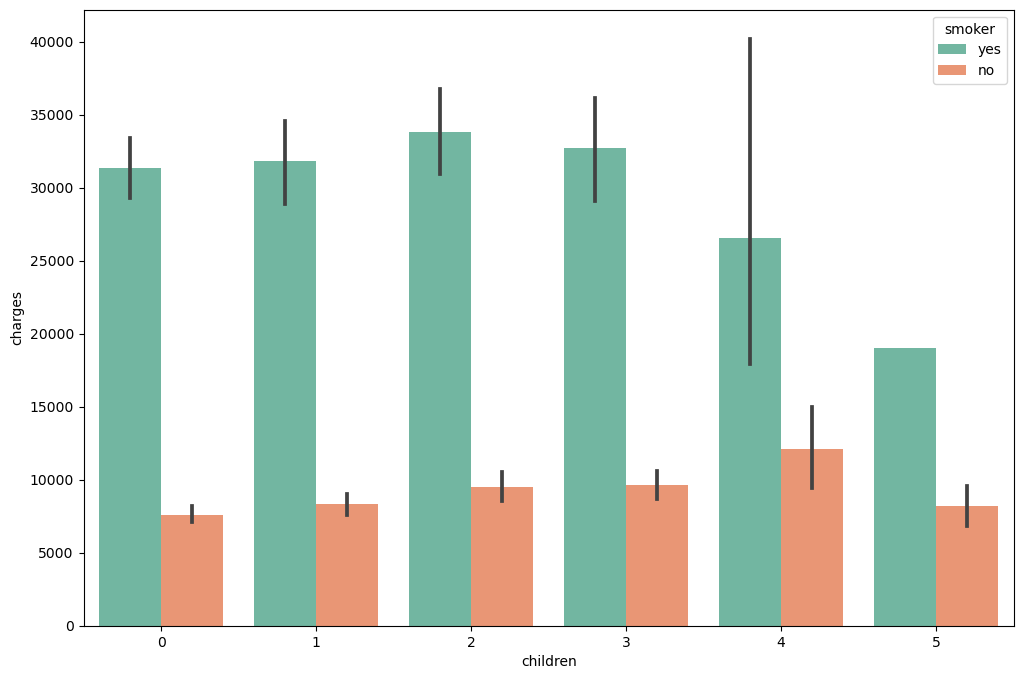

In [50]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='children', y='charges', hue='smoker', data=df, palette='Set2')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8908\2983282606.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



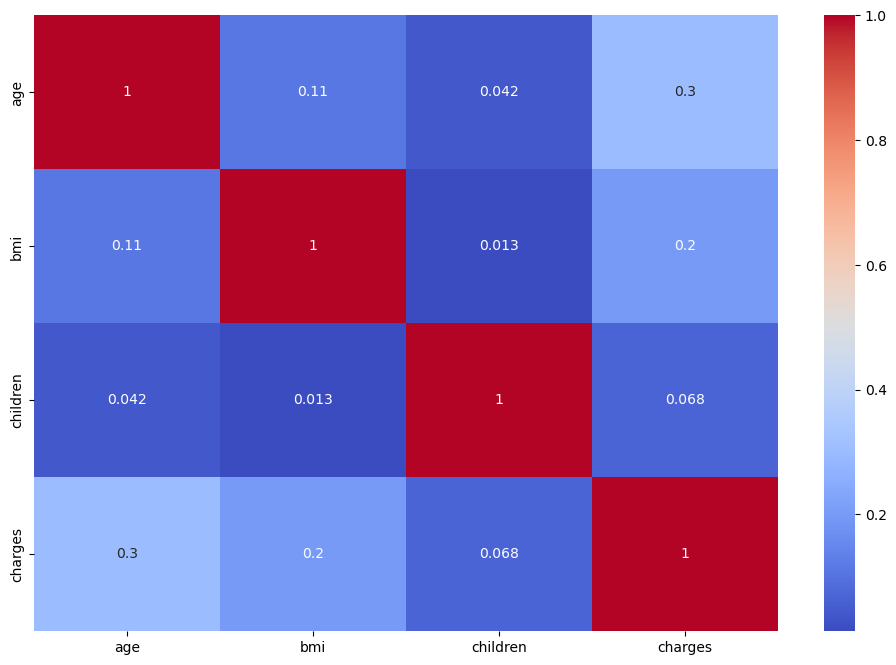

# Encoding 

In [70]:
# label Encoding 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["sex"] = label.fit_transform(df["sex"]) 
df["smoker"] = label.fit_transform(df["smoker"]) 
df["region"] = label.fit_transform(df["region"]) 

In [72]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Age_Category,BMI_Category
0,19,0,27.900,0,1,3,16884.92400,Young Adults,Overweight (Pre-obese)
1,18,1,33.770,1,0,2,1725.55230,Young Adults,Obese (Class I)
2,28,1,33.000,3,0,2,4449.46200,Young Adults,Obese (Class I)
3,33,1,22.705,0,0,1,21984.47061,Old Adults,Normal range
4,32,1,28.880,0,0,1,3866.85520,Old Adults,Overweight (Pre-obese)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_8908\2983282606.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



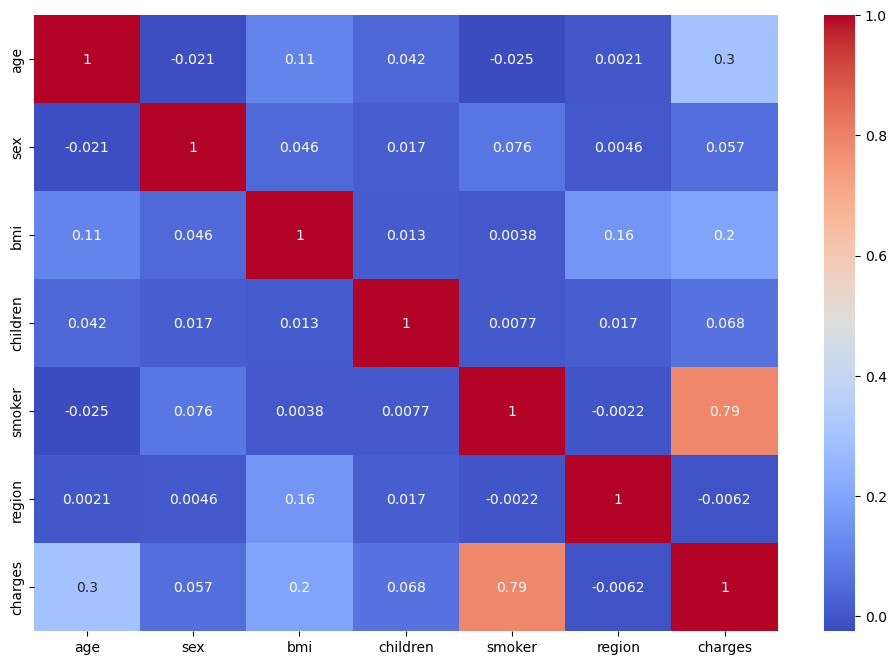

In [73]:
corr = df.corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)
fig = ax.get_figure()

### As we can see that there are a lot more co-relation froming from the previous heatmap the main relation is between Smoker and Charges also the have some corelations between them but they are very little